## Import Libraries

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import joblib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import classification_report
from collections import Counter
from plotly.subplots import make_subplots
from imblearn.over_sampling import SMOTE

sns.set_style('whitegrid')
sns.set_palette('Set2')
pd.options.plotting.backend = 'plotly'


## Load data

In [2]:
df = pd.read_csv('/content/data.csv')
print("Shape of data: ",df.shape)

Shape of data:  (4981, 11)


In [5]:
print("data description")
df.describe()

data description


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [6]:
def eliminarDatosFaltantes(dta):
    dta['smoking_status'].replace(to_replace='Unknown', value=np.nan,inplace=True)
    return dta.dropna()


print("\nSummary of Dataset:")
df = eliminarDatosFaltantes(df)
print(df.info())




Summary of Dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3481 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3481 non-null   object 
 1   age                3481 non-null   float64
 2   hypertension       3481 non-null   int64  
 3   heart_disease      3481 non-null   int64  
 4   ever_married       3481 non-null   object 
 5   work_type          3481 non-null   object 
 6   Residence_type     3481 non-null   object 
 7   avg_glucose_level  3481 non-null   float64
 8   bmi                3481 non-null   float64
 9   smoking_status     3481 non-null   object 
 10  stroke             3481 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 326.3+ KB
None


In [7]:
print("data description")
df.describe()

data description


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,3481.000000,3481.00000,3481.000000,3481.000000,3481.000000,3481.000000
mean,49.067509,0.12324,0.065211,108.769155,29.808159,0.057742
std,18.894255,0.32876,0.246934,48.133475,6.228310,0.233288
min,10.000000,0.00000,0.000000,55.120000,14.100000,0.000000
25%,34.000000,0.00000,0.000000,77.450000,25.300000,0.000000
50%,50.000000,0.00000,0.000000,92.490000,29.100000,0.000000
75%,64.000000,0.00000,0.000000,116.250000,33.500000,0.000000
max,82.000000,1.00000,1.000000,271.740000,48.900000,1.000000


In [8]:
from tabulate import tabulate

print("\nDataset:")
print(tabulate(df.head(), headers='keys', tablefmt='fancy_grid'))



Dataset:
╒════╤══════════╤═══════╤════════════════╤═════════════════╤════════════════╤═══════════════╤══════════════════╤═════════════════════╤═══════╤══════════════════╤══════════╕
│    │ gender   │   age │   hypertension │   heart_disease │ ever_married   │ work_type     │ Residence_type   │   avg_glucose_level │   bmi │ smoking_status   │   stroke │
╞════╪══════════╪═══════╪════════════════╪═════════════════╪════════════════╪═══════════════╪══════════════════╪═════════════════════╪═══════╪══════════════════╪══════════╡
│  0 │ Male     │    67 │              0 │               1 │ Yes            │ Private       │ Urban            │              228.69 │  36.6 │ formerly smoked  │        1 │
├────┼──────────┼───────┼────────────────┼─────────────────┼────────────────┼───────────────┼──────────────────┼─────────────────────┼───────┼──────────────────┼──────────┤
│  1 │ Male     │    80 │              0 │               1 │ Yes            │ Private       │ Rural            │             

In [9]:
print("\nNull values in df:\n", df.isnull().sum())



Null values in df:
 gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [10]:
print("Duplicate values in dataset: ", df.duplicated().sum())


Duplicate values in dataset:  0


In [11]:
# Minimum and Maximum values in train_df dataset
print("\033[1mMinimum and Maximum values in dataset:\033[0m")
print(df.agg(['min', 'max']), end="\n\n")


Minimum and Maximum values in dataset:
     gender   age  hypertension  heart_disease ever_married work_type  \
min  Female  10.0             0              0           No  Govt_job   
max    Male  82.0             1              1          Yes  children   

    Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
min          Rural              55.12  14.1  formerly smoked       0  
max          Urban             271.74  48.9           smokes       1  



In [12]:
category=df.columns.difference(df._get_numeric_data().columns)
for col in category:
    print(col,':',df[col].unique())

Residence_type : ['Urban' 'Rural']
ever_married : ['Yes' 'No']
gender : ['Male' 'Female']
smoking_status : ['formerly smoked' 'never smoked' 'smokes']
work_type : ['Private' 'Self-employed' 'Govt_job' 'children']


In [13]:
df['ever_married']=df['ever_married'].replace({'Yes':1,'No':0})


<ipython-input-13-0864a27d6f65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ever_married']=df['ever_married'].replace({'Yes':1,'No':0})


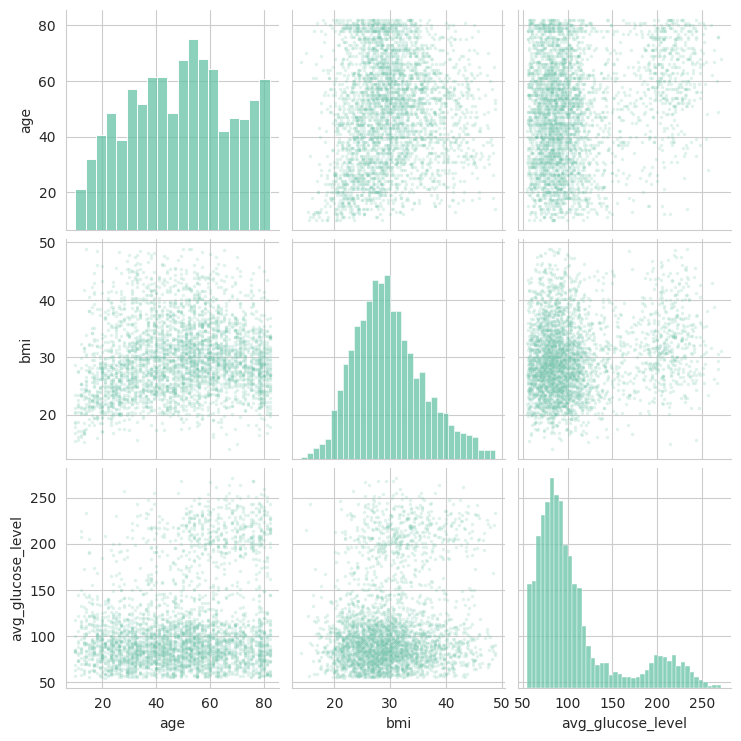

In [14]:
sns.pairplot(data=df,vars=['age','bmi','avg_glucose_level'] , plot_kws={'alpha': 0.2,'s':6})
plt.show()

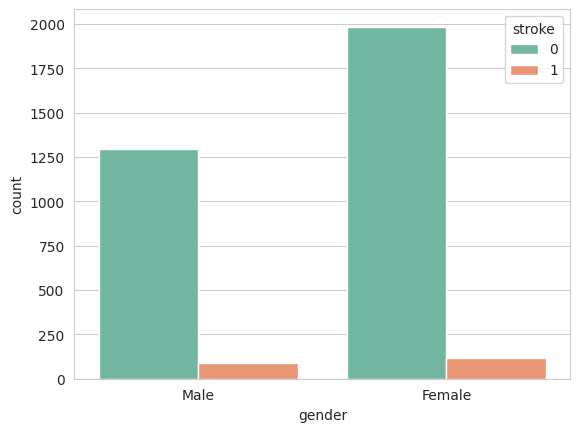

In [15]:
sns.countplot(x='gender',hue='stroke',data=df)
plt.show()


## Scaling Data

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["gender"]=le.fit_transform(df["gender"])
df["ever_married"]=le.fit_transform(df["ever_married"])

df["work_type"]=le.fit_transform(df["work_type"])

df["smoking_status"]=le.fit_transform(df["smoking_status"])
df["Residence_type"]=le.fit_transform(df["Residence_type"])

df

<ipython-input-16-fee960fef906>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gender"]=le.fit_transform(df["gender"])
<ipython-input-16-fee960fef906>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ever_married"]=le.fit_transform(df["ever_married"])
<ipython-input-16-fee960fef906>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,0,1
1,1,80.0,0,1,1,1,0,105.92,32.5,1,1
2,0,49.0,0,0,1,1,1,171.23,34.4,2,1
3,0,79.0,1,0,1,2,0,174.12,24.0,1,1
4,1,81.0,0,0,1,1,1,186.21,29.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,0,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,2,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,2,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,2,0


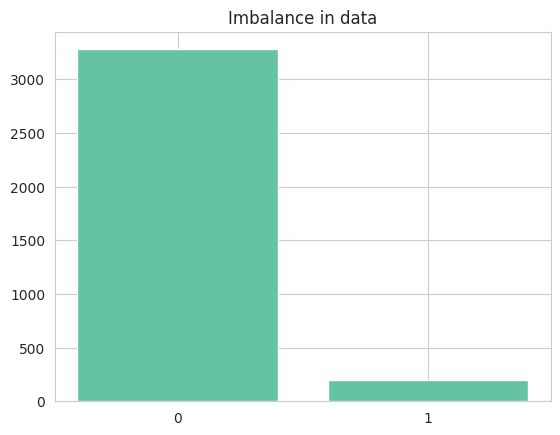

In [17]:
target_counts = df['stroke'].value_counts()

plt.bar(target_counts.index, target_counts.values)

plt.title('Imbalance in data')
plt.xticks(target_counts.index, ['0', '1'])
plt.show()

## Using SMOTE to handle imbalance data

In [18]:

X = df.drop('stroke', axis=1)
y = df['stroke']
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

## Tunning hyperparameter by using GridSearchCV

In [19]:
parameters = {'kernel': ['linear', 'rbf'], 'C': [10, 20, 50, 100], 'gamma': [0.1, 0.01, 0.001]}
svm = SVC()
grid_search = GridSearchCV(svm, parameters)
grid_search.fit(X_train, y_train)
results_df = pd.DataFrame(grid_search.cv_results_['params'])
results_df['Mean Test Score'] = grid_search.cv_results_['mean_test_score']
best_svm = grid_search.best_estimator_
accuracy = best_svm.score(X_test, y_test)

print(results_df)

best_params = pd.DataFrame([grid_search.best_params_])
best_accuracy = pd.DataFrame({"Accuracy on Test Set": [accuracy]})

print("Best hyperparameter and best accuracy on test set: ")
print(best_params)
print(best_accuracy)

      C  gamma  kernel  Mean Test Score
0    10  0.100  linear         0.787916
1    10  0.100     rbf         0.929117
2    10  0.010  linear         0.787916
3    10  0.010     rbf         0.910250
4    10  0.001  linear         0.787916
5    10  0.001     rbf         0.827934
6    20  0.100  linear         0.789250
7    20  0.100     rbf         0.929878
8    20  0.010  linear         0.789250
9    20  0.010     rbf         0.917683
10   20  0.001  linear         0.789250
11   20  0.001     rbf         0.836698
12   50  0.100  linear         0.791918
13   50  0.100     rbf         0.929116
14   50  0.010  linear         0.791918
15   50  0.010     rbf         0.923400
16   50  0.001  linear         0.791918
17   50  0.001     rbf         0.849465
18  100  0.100  linear         0.791918
19  100  0.100     rbf         0.929116
20  100  0.010  linear         0.791918
21  100  0.010     rbf         0.926830
22  100  0.001  linear         0.791918
23  100  0.001     rbf         0.854611


In [20]:
y_pred = best_svm.predict(X_test)


report = classification_report(y_test, y_pred)


print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       665
           1       0.93      0.96      0.95       647

    accuracy                           0.95      1312
   macro avg       0.95      0.95      0.95      1312
weighted avg       0.95      0.95      0.95      1312

